# LSE Data Analysis

# Table of Contents
* [1 Introduction](#introduction)
    * [1.1 Research Questions](#research_questions)
* [2 Data Acquisition](#data_acquisition)
    * [2.1 Datasets](#datasets)
    * [2.2 Guardian University Rankings](#data_collection_1)
    * [2.3 Guardian API](#data_collection_2)
    * [2.4 Tweets](#data_collection_3)
* [3 Data Preparation](#data_preparation)
    * [3.1 Guardian University Rankings](#data_prep_1)
        * [3.1.1 University Rankings by Year](#data_prep_1_1) 
        * [3.1.2 Course Satisfaction (2018-2022)](#data_prep_1_2) 
    * [3.2 Guardian API](#data_prep_2)
    * [3.3 Tweets](#data_prep_3)
* [4 Exploratory Data Analysis](#eda)
    * [4.1 Guardian University Rankings](#eda_1)
        * [4.1.1 University Rankings by Year](#eda_1_1)
        * [4.1.2 Course Satisfaction (2018-2022)](#eda_1_2) 
    * [4.2 Guardian API](#eda_2)
        * [4.2.1 Articles](#eda_2_1)
        * [4.2.2 Articles Titles](#eda_2_2)
        * [4.2.3 Articles Sections](#eda_2_3)
    * [4.3 Tweets](#eda_3)
* [5 Conclusion](#conclusion)
    * [5.1 How has the ranking of LSE changed over the years? And how does it compare with other universities?](#q1)
    * [5.2 What does the public think of LSE?](#q2)
    * [5.3 Limitations](#limitations)
    
FYI, will take a long time to run the entire Jupyter Notebook due to the large amount of data. 

# Introduction <a class="anchor" id="introduction"></a>

The London School of Economics and Political Science has always been one of the top universities in the UK, well known for its academic excellence in the social sciences. It is ranked #3 in the world for Social Sciences & Management ([QS Rankings 2022](https://www.topuniversities.com/university-rankings/university-subject-rankings/2022/social-sciences-management)). It is also known for its career prospects, where many graduates go on to work in various top firms in the UK and around the world. Some even become world leaders in our current society. However, the school has been criticised for its low student satisfaction and poor social life.

As a student of LSE, I am motivated to better understand how LSE compares to other top universities in the United Kingdom, and how the general public thinks of the school. This will allow me to grasp how the public perceives LSE, and will also be useful information for prospective students or anyone who is interested in applying to LSE. 


## Research Questions <a class="anchor" id="research_questions"></a>
1. How has the ranking of LSE changed over the years? And how does it compare with other universities?
2. What does the public think of LSE? (From news, Twitter etc.)

# Data Acquisition <a class="anchor" id="data_acquisition"></a>

## Datasets <a class="anchor" id="datasets"></a>
Below are the datasets I will use to conduct my analysis

1. Guardian University Rankings (2010 to 2022)
    - This dataset will allow me to gain better insight into how LSE compares with other universities in the UK (particularly other highly ranked universities) 
<br>
<br>
2. [The Guardian OpenPlatform](https://open-platform.theguardian.com/) (Guardian API)
    - Contains news articles, images and videos from The Guardian newspaper dating back to 1999. You will have to register for a developer key using the link above and update the key in `keys.json`.
    - This dataset allows me to analyse the public perception of LSE (from a news perspective)
<br>
<br>
3. Tweets (posts on the social media platform [Twitter](https://www.twitter.com))
    - Tweets containing the keyword `London School of Economics`, will gather data using the scraper `snscrape`. To install `snscrape` please refer [here](https://github.com/JustAnotherArchivist/snscrape)
    - This dataset also allows me to analyse the public perception of LSE (from individuals)

## Guardian University Rankings <a class="anchor" id="data_collection_1"></a>

In [1]:
import pandas as pd

I will create a `list of list` to store the website links of UK university rankings for each year. This is the most convenient method as the links to each table are fairly different. However, I will admit that this will make it inconvenient to update the code in the future, as I would need to add the links manually. (I also added the years to make it easier to see which link corresponds to which year, was not needed for the code)

The league tables from 2015-2017 cannot be scrapped using `pd.read_html`, so I downloaded the tables manually and saved them in the `data` folder. I will obtain that data using `pd.read_csv`. 

In [2]:
all_url = [['https://www.theguardian.com/education/table/2009/may/12/university-league-table', 2010],
           ['https://www.theguardian.com/education/table/2010/jun/04/university-league-table', 2011],
           ['https://www.theguardian.com/education/table/2011/may/17/university-league-table-2012', 2012],
           ['https://www.theguardian.com/education/table/2012/may/21/university-league-table-2013', 2013],
           ['https://www.theguardian.com/education/table/2013/jun/03/university-league-table-2014', 2014],
           ['https://www.theguardian.com/education/ng-interactive/2017/may/16/university-league-tables-2018', 2018],
           ['https://www.theguardian.com/education/ng-interactive/2018/may/29/university-league-tables-2019', 2019],
           ['https://www.theguardian.com/education/ng-interactive/2019/jun/07/university-league-tables-2020', 2020],
           ['https://www.theguardian.com/education/ng-interactive/2020/sep/05/the-best-uk-universities-2021-league-table', 2021],
           ['https://www.theguardian.com/education/ng-interactive/2021/sep/11/the-best-uk-universities-2022-rankings', 2022]
           ]

In [3]:
all_rankings = []
for year in all_url:
    url = year[0]
    ranking = pd.read_html(url)
    ranking = ranking[0]
    all_rankings.append(ranking)

Adding back the missing years 

In [4]:
df_2015 = pd.read_csv('data/guardian_2015.csv')
df_2016 = pd.read_csv('data/guardian_2016.csv')
df_2017 = pd.read_csv('data/guardian_2017.csv')

In [5]:
all_rankings.insert(5, df_2015)
all_rankings.insert(6, df_2016)
all_rankings.insert(7, df_2017)

All the Guardian UK university league rankings for each year are stored in a list named `all_rankings`

In [6]:
all_rankings[0].head()

2010 ranking (2009)         Name of Institution  Guardian score/ 100  \
0               1 (1)                      Oxford                100.0   
1               2 (2)                   Cambridge                 97.0   
2               3 (5)                  St Andrews                 87.0   
3               4 (4)                     Warwick                 84.0   
4               5 (3)  London School of Economics                 82.4   

   % Satisfied with teaching  % Satisfied with feedback  \
0                       92.0                       68.0   
1                       92.0                       76.0   
2                       94.0                       75.0   
3                       86.0                       60.0   
4                       73.0                       63.0   

   Spend per student (FTE)  Student: staff ratio  Career prospects  \
0                    10.00                  11.8                79   
1                     9.46                  12.1                83   
2                     6.55                  12.8                74   
3                     8.76                  15.2                76   
4                     7.62                  14.5                86   

   Value added score/ 10  Average Entry Tariff  
0                    6.7                 522.0  
1                    4.9                 535.0  
2                    7.2                 466.0  
3                    6.0                 461.0  
4                    5.4                 481.0

In [7]:
for i, ranking in enumerate(all_rankings, start = 2010):
    ranking.to_csv(f'data_for_verify/guardian_ranking_data/guardian_ranking_{i}.csv', index = False)

The raw data will be stored in a folder named `guardian_ranking_data` in `data_for_verify` (so you can verify the result)

Data was collected on 28-4-2022 (the last time I ran the code)

## Guardian API <a class="anchor" id="data_collection_2"></a>

In [197]:
import json
import requests

An API key will be required to access the data, you will need to update the `keys.json` file with your own The Guardian Open Platform API key.

In [198]:
with open('keys.json') as f:
    keys = json.load(f)
key = keys['guardian']['api_key'] 

If I use the search term `london school of economics`, it will also gather articles containing only the word `economics` as well. So it would be best to use the search term as `LSE` and remove the articles with the word `stock` in them, as LSE can also stand for the London Stock Exchange. 

Admittedly, it is impossible to ensure that all the articles are related to LSE, but there should be enough articles to show some trends.

First I will test if the API works

In [203]:
url = f'https://content.guardianapis.com/search?q=lse%20AND%20NOT%20stock&api-key={key}&show-blocks=body&page-size=50'
r = requests.get(url)
r

<Response [200]>

In [204]:
parsed = json.loads(r.text)

In [205]:
all_articles = []
all_titles = []
all_sections = []
all_articles_str = ''
all_titles_str = ''
all_sections_str = ''

for i in range(parsed['response']['pages']):
    page = i+1
    url = f'https://content.guardianapis.com/search?q=lse%20AND%20NOT%20stock&api-key={key}&show-blocks=body&page-size=50&page={page}'
    r = requests.get(url)
    parsed = json.loads(r.text)
    for i in range(parsed['response']['pageSize']):
        try: # check if an article exists cause it might be a video or something else
            title = parsed['response']['results'][i]['webTitle']
            all_titles.append(title)
            all_titles_str = all_titles_str + ' ' + title
            section = parsed['response']['results'][i]['sectionName']
            all_sections.append(section)
            all_sections_str = all_sections_str + ' ' + section
            article = parsed['response']['results'][i]['blocks']['body'][0]['bodyTextSummary'] 
            all_articles.append(article)
            all_articles_str = all_articles_str + ' ' + article
        except IndexError:
            pass

The data I collected are in the form of a `list of str` and `str`:
- `all_articles` is a list of str, which each element corresponding to an article
- `all_titles` is a list of str, which each element corresponding to an title
- `all_sections` is a list of str, which each element corresponding to an section name
- `all_articles_str` is an str containing all the articles
- `all_titles_str` is an str containing all the titles
- `all_sections_str` is an str containing all the section names

In [206]:
import pickle

In [224]:
api_data = [[all_articles, 'all_articles'],
            [all_titles, 'all_titles'],
            [all_sections, 'all_sections'],
            [all_articles_str, 'all_articles_str'],
            [all_titles_str, 'all_titles_str'],
            [all_sections_str, 'all_sections_str']]

In [228]:
for data in api_data:
    filename = f'data_for_verify/api_data/{data[1]}'
    outfile = open(filename,'wb')
    pickle.dump(data[0], outfile)
    outfile.close()

The raw data will be stored in a folder named `api_data` in `data_for_verify` (so you can verify the result)

Data was collected on 28-4-2022 (the last time I ran the code)

## Tweets <a class="anchor" id="data_collection_3"></a>
I will use `snscrape` to scrape tweets with the keyword `London School of Economics`, decided to not use `LSE` because it is an acronym for many things. Using `London School of Economics` will only scrape the tweets containing all these four words. 

The data I will is a `pd.DataFrame` of 100001 tweets which includes the `Datetime`, `Text`, `Likes`, `Username` and `Language`. 

In [ ]:
import snscrape.modules.twitter as sntwitter

In [ ]:
tweets_list1 = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('London School of Economics').get_items()): 
    if i > 100000: 
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.likeCount, tweet.user.username, tweet.lang]) 

tweets_df = pd.DataFrame(tweets_list1, columns = ['Datetime', 'Text', 'Likes', 'Username', 'Language'])

Reference: https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

In [ ]:
tweets_df.head()

In [ ]:
tweets_df.to_csv('data/tweets.csv', index=False)

The tweets will be saved in csv file called `tweets.csv` in the `data` folder

Data was collected on 28-4-2022 (the last time I ran the code)

# Data Preparation <a class="anchor" id="data_preparation"></a>

## Guardian University Rankings <a class="anchor" id="data_prep_1"></a>
Some data cleaning is required for the tables from 2018-2022 are not in a desired format. Every other column contains some `str` and `NaN`, also rows 50, 100, 150 and 200 (multiples of 50) contains only `NaN`.

In [8]:
all_rankings[9][46:52] # Issues with the dataframe

2019  \
46                                                 24   
47  Satisfied with course  88  Satisfied with teac...   
48                                                 25   
49  Satisfied with course  88  Satisfied with teac...   
50                                                NaN   
51                                                 26   

                                                 2018  \
46                                                 23   
47  Satisfied with course  88  Satisfied with teac...   
48                                                 37   
49  Satisfied with course  88  Satisfied with teac...   
50                                                NaN   
51                                                 20   

                                          Institution  \
46                                            Glasgow   
47  Satisfied with course  88  Satisfied with teac...   
48                                         Portsmouth   
49  Satisfied with course  88  Satisfied with teac...   
50                                                NaN   
51                                             Sussex   

                                   Guardian score/100  Satisfied with course  \
46                                               72.1                   88.0   
47  Satisfied with course  88  Satisfied with teac...                    NaN   
48                                                 72                   88.0   
49  Satisfied with course  88  Satisfied with teac...                    NaN   
50                                                NaN                    NaN   
51                                               71.9                   88.0   

    Satisfied with teaching  Satisfied with feedback  Student to staff ratio  \
46                     89.0                     67.0                    14.9   
47                      NaN                      NaN                     NaN   
48                     88.0                     75.0                    15.4   
49                      NaN                      NaN                     NaN   
50                      NaN                      NaN                     NaN   
51                     87.0                     69.0                    16.4   

    Spend per student/10  Average entry tariff  Value added score/10  \
46                   6.0                 200.0                   5.6   
47                   NaN                   NaN                   NaN   
48                   5.9                 119.0                   6.0   
49                   NaN                   NaN                   NaN   
50                   NaN                   NaN                   NaN   
51                   7.0                 144.0                   4.5   

    Career after 6 months  Contin-uation  
46                   84.0           93.0  
47                    NaN            NaN  
48                   80.0           91.0  
49                    NaN            NaN  
50                    NaN            NaN  
51                   80.0           95.0

In [9]:
for i in range(5):
    all_rankings[i+8].drop(index = [50, 100, 150, 200], inplace = True)
    all_rankings[i+8].reset_index(drop = True, inplace = True)
    
    all_rankings[i+8] = all_rankings[i+8].iloc[::2]
    all_rankings[i+8].reset_index(drop = True, inplace = True)

Changing the first column to the corresponding year and changing the column name of all the universities to `Institution`, makes it easier to merge data later. As the tables vary each year and sometimes the columns are named `Name of institution` or `Name of Institution` or `Institution`. 

Assumptions:
- The first column is the university's current year rank
- All universities go by the same name on all the rankings

In [10]:
uni_rankings = []
for i, year_ranking in enumerate(all_rankings, start = 2010):
    year = str(i)
    year_ranking_copy = year_ranking.copy() # Creating a copy to prevent editing a slice (so there's no python warning)
    year_ranking_copy.rename(columns = {year_ranking_copy.columns[0] : f'{year}'}, inplace = True)
    if 'Name of Institution' in year_ranking_copy.columns:
        year_ranking_copy.rename(columns = {'Name of Institution' : 'Institution'}, inplace = True)
    if 'Name of institution' in year_ranking_copy.columns:
        year_ranking_copy.rename(columns = {'Name of institution' : 'Institution'}, inplace = True)
    uni_rankings.append(year_ranking_copy)

Now, the "cleaned" data for each year are stored in a list of dataframes called `uni_rankings`

All of this was in some way hard coding, which is not ideal. However, it was necessary to clean the dataset.

### University Rankings by Year <a class="anchor" id="data_prep_1_1"></a>
Creating a `pd.DataFrame` that represents the university rankings for each year

In [11]:
for i, year_ranking in enumerate(uni_rankings, start = 2010):
    df_ranking = year_ranking[[f'{i}', 'Institution']]
    if i == 2010:
        df_uni_rankings = df_ranking
    else:
        df_uni_rankings = df_uni_rankings.merge(df_ranking, on = 'Institution', how = 'inner')
df_uni_rankings.set_index("Institution", drop = True, inplace = True)

I used an inner join only because I am primarily considering top universities, so they would have appeared on the rankings for all of the years. Also, it is fairly confusing to plot universities with data points that only occur in certain years.

In [12]:
df_uni_rankings[:5]

2010  2011  2012  2013 2014        2015  2016  \
Institution                                                                  
Oxford                      1 (1)   1.0   2.0     2    2   2 _ 2 _ 2     2   
Cambridge                   2 (2)   2.0   1.0     1    1   1 _ 1 _ 1     1   
St Andrews                  3 (5)   4.0   3.0     4    4   4 _ 4 _ 3     3   
Warwick                     4 (4)   3.0   6.0     5   10  5 _ 10 _ 9     6   
London School of Economics  5 (3)   8.0   4.0     3    3   3 _ 3 _ 7    13   

                            2017 2018 2019 2020 2021 2022  
Institution                                                
Oxford                       2.0    2    2    3    1    1  
Cambridge                    1.0    1    1    1    3    2  
St Andrews                   3.0    3    3    2    2    3  
Warwick                      9.0    8    8    9    8    6  
London School of Economics  12.0   15   15   19    5    4

Again, hard coding will be necessary since the years 2010 and 2015 are not in the desired format. The number in the brackets in the 2010 column represents in 2009 ranking. The last number in the 2015 column is the 2015 ranking for the corresponding university.

In [13]:
ranking_2010 = []
for i in range(91):
    ranking_2010.append(df_uni_rankings['2010'].str.split('(')[i][0])

df_uni_rankings['2010'] = ranking_2010

In [14]:
ranking_2015 = []
for i in range(91):
    ranking_2015.append(df_uni_rankings['2015'].str.split('_')[i][2])
    
df_uni_rankings['2015'] = ranking_2015

In [15]:
df_uni_rankings.dtypes

2010     object
2011    float64
2012    float64
2013      int64
2014     object
2015     object
2016      int64
2017    float64
2018     object
2019     object
2020     object
2021     object
2022     object
dtype: object

I will convert the data types of all columns to `float64`. Before that, will have to alter one data point to allow all the columns to be converted to `float64`

In [16]:
df_uni_rankings[45:48]

2010  2011  2012  2013 2014 2015  2016  2017 2018 2019 2020  \
Institution                                                                     
Queen's, Belfast   49   56.0  50.0    53   48   46    45  48.0   38   52   53   
Keele             50 -  44.0  54.0    50   45   41    42  34.0   36   36   32   
Plymouth           51   49.0  47.0    61   59   68    87  76.0   78   66   60   

                 2021 2022  
Institution                 
Queen's, Belfast   46   33  
Keele              35   48  
Plymouth           53   41

In [17]:
df_uni_rankings.replace('50 -', 50, inplace = True)
df_uni_rankings = df_uni_rankings.astype('int64')

In [18]:
df_uni_rankings.head()

2010  2011  2012  2013  2014  2015  2016  2017  \
Institution                                                                  
Oxford                         1     1     2     2     2     2     2     2   
Cambridge                      2     2     1     1     1     1     1     1   
St Andrews                     3     4     3     4     4     3     3     3   
Warwick                        4     3     6     5    10     9     6     9   
London School of Economics     5     8     4     3     3     7    13    12   

                            2018  2019  2020  2021  2022  
Institution                                               
Oxford                         2     2     3     1     1  
Cambridge                      1     1     1     3     2  
St Andrews                     3     3     2     2     3  
Warwick                        8     8     9     8     6  
London School of Economics    15    15    19     5     4

Converting the dataframe to a format which can be presented on a graph

In [19]:
df_uni_rankings = df_uni_rankings.transpose()
df_uni_rankings.index = pd.to_datetime(df_uni_rankings.index) # looks better on the graph, easier to work with

### Course Satisfaction (2018-2022) <a class="anchor" id="data_prep_1_2"></a>
One of the common columns for all the universities' rankings from 2018 to 2022 is `Satisfied with course`, it represents the rating for the overall quality of the course, given by final-year students in the latest NSS. This data can be useful as we can see whether students are satisfied with their course, which is a major part of the university experience.

In [20]:
for i, year_ranking in enumerate(uni_rankings[8:13], start = 2018):
    year_ranking_copy = year_ranking.copy()
    year_ranking_copy.rename(columns = {'Satisfied with course' : f'Satisfied with course {i}'}, inplace = True)
    if i == 2018:
        df_satisfaction = year_ranking_copy[['Institution', f'Satisfied with course {i}']]
    else:
        df_satisfaction = df_satisfaction.merge(year_ranking_copy[['Institution', f'Satisfied with course {i}']],
                                                on = 'Institution', how = 'inner')
df_satisfaction.set_index("Institution", drop = True, inplace = True)
df_satisfaction.head()

Satisfied with course 2018  Satisfied with course 2019  \
Institution                                                           
Cambridge                          87.8                        89.0   
Oxford                             88.4                        90.0   
St Andrews                         94.9                        93.0   
Durham                             89.7                        89.0   
Bath                               88.7                        88.0   

             Satisfied with course 2020  Satisfied with course 2021  \
Institution                                                           
Cambridge                           NaN                         NaN   
Oxford                              NaN                         NaN   
St Andrews                         93.0                        94.0   
Durham                             85.0                        86.1   
Bath                               86.0                        87.7   

             Satisfied with course 2022  
Institution                              
Cambridge                           NaN  
Oxford                              NaN  
St Andrews                         93.1  
Durham                             83.9  
Bath                               87.1

We see Cambridge and Oxford do not have data points for 2020-2022, so I will exclude these two universities.

In [21]:
df_satisfaction.rename(columns = {'Satisfied with course 2018' : '2018',
                                  'Satisfied with course 2019' : '2019',
                                  'Satisfied with course 2020' : '2020',
                                  'Satisfied with course 2021' : '2021',
                                  'Satisfied with course 2022' : '2022'}, inplace = True)
df_satisfaction = df_satisfaction.transpose()
df_satisfaction.index = pd.to_datetime(df_satisfaction.index) 
df_satisfaction[df_satisfaction.columns[2:16]]

Institution  St Andrews  Durham  Bath  Loughborough  Imperial College  \
2018-01-01         94.9    89.7  88.7          89.2              84.1   
2019-01-01         93.0    89.0  88.0          90.0              83.0   
2020-01-01         93.0    85.0  86.0          88.0              82.0   
2021-01-01         94.0    86.1  87.7          89.6              81.6   
2022-01-01         93.1    83.9  87.1          86.8              83.0   

Institution  Warwick  Lancaster  Surrey   UCL  Coventry  Exeter  Leeds  \
2018-01-01      88.7       89.7    90.0  84.2      90.6    89.8   90.1   
2019-01-01      88.0       90.0    88.0  81.0      88.0    89.0   89.0   
2020-01-01      86.0       89.0    84.0  79.0      87.0    87.0   88.0   
2021-01-01      86.2       86.9    81.1  81.2      83.2    86.6   84.1   
2022-01-01      84.6       84.7    80.1  78.1      79.3    80.8   78.8   

Institution  Birmingham  London School of Economics  
2018-01-01         88.2                        75.4  
2019-01-01         88.0                        73.0  
2020-01-01         86.0                        69.0  
2021-01-01         84.2                        80.6  
2022-01-01         77.4                        80.1

## Guardian API <a class="anchor" id="data_prep_2"></a>
Just to see how many articles was collected

In [231]:
len(all_articles)

3329

In [232]:
import collections
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

Creating a larger list of stop words including the stop words from `wordcloud` to remove more unwanted words

In [282]:
from wordcloud import WordCloud, STOPWORDS
sw = stopwords.words('English')
STOPWORDS.update(sw)

In [283]:
word_count = collections.Counter()
all_words = []

for article in all_articles:
    words = word_tokenize(article.lower())
    for one_word in words:
        one_word = one_word.strip(string.punctuation)
        if one_word not in STOPWORDS and one_word.isalpha() == True and one_word != "lse":
            word_count[one_word] += 1

Created a `word_count` based on the words in the articles. Gives a better idea of the most common words used to describe LSE.

Will do the same with the titles and section names below.

In [284]:
word_count_title = collections.Counter()
all_words_title = []
for title in all_titles:
    words = title.lower().split()
    all_words_title = all_words_title + words
for one_word in all_words_title:
    if one_word not in STOPWORDS and one_word.isalpha() == True:
        word_count_title[one_word] += 1

In [285]:
word_count_sections = collections.Counter()
for section in all_sections:
    word_count_sections[section] += 1

## Tweets <a class="anchor" id="data_prep_3"></a>

In [407]:
tweets_df = pd.read_csv('data/tweets.csv')

For an unknown reason, after saving the `tweets_df` as a csv file, there now seems to be way more than 100001 tweets when I load in the csv file. The issue seems to be the fact that there are some spam tweets, which I will first remove. 

In [408]:
tweets_df.tail()

Datetime      Tweet Id  \
399105  2013-10-05 15:03:34+00:00  3.865070e+17   
399106  2013-10-05 15:01:08+00:00  3.865063e+17   
399107  2013-10-05 15:01:03+00:00  3.865063e+17   
399108  2013-10-05 14:59:33+00:00  3.865059e+17   
399109  2013-10-05 14:55:54+00:00  3.865050e+17   

                                                     Text Likes  \
399105  London School of Economics: #piracy isn't kill...     0   
399106  London School of Economics: la piratería no af...     0   
399107  London School of Economics: la piratería no af...     0   
399108  RT @salfarorotondo: London School of Economics...     0   
399109  London School of Economics: la piratería no ma...     0   

              Username Language  
399105       Mondomoog       en  
399106        ediazsan       es  
399107       _atreZZo_       es  
399108   sgarciaasenjo       es  
399109  salfarorotondo       es

In [409]:
tweets_df[300000:300005] # Spam Tweets

Datetime      Tweet Id  \
300000  2014-02-02 10:29:43+00:00  4.299246e+17   
300001  2014-02-02 10:29:43+00:00  4.299246e+17   
300002  2014-02-02 10:29:43+00:00  4.299246e+17   
300003  2014-02-02 10:29:43+00:00  4.299246e+17   
300004  2014-02-02 10:29:43+00:00  4.299246e+17   

                                                     Text Likes Username  \
300000  Listening to London School of Economics:  Publ...   NaN      NaN   
300001  Listening to London School of Economics:  Publ...   NaN      NaN   
300002  Listening to London School of Economics:  Publ...   NaN      NaN   
300003  Listening to London School of Economics:  Publ...   NaN      NaN   
300004  Listening to London School of Economics:  Publ...   NaN      NaN   

       Language  
300000      NaN  
300001      NaN  
300002      NaN  
300003      NaN  
300004      NaN

In [410]:
tweets_df.dropna(axis = 0, inplace = True)
tweets_df.reset_index(drop = True, inplace = True)
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'])
tweets_df = tweets_df.astype({'Text': 'str', 'Likes' : 'int64', 'Language' : 'category'})

In [411]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99986 entries, 0 to 99985
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  99986 non-null  datetime64[ns, UTC]
 1   Tweet Id  99986 non-null  float64            
 2   Text      99986 non-null  object             
 3   Likes     99986 non-null  int64              
 4   Username  99986 non-null  object             
 5   Language  99986 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 3.9+ MB


There are now 99989 tweets with no missing data as I've used `dropna()` to remove the tweets with NaN.

Not all the tweets are written in English, as seen from the chart below.

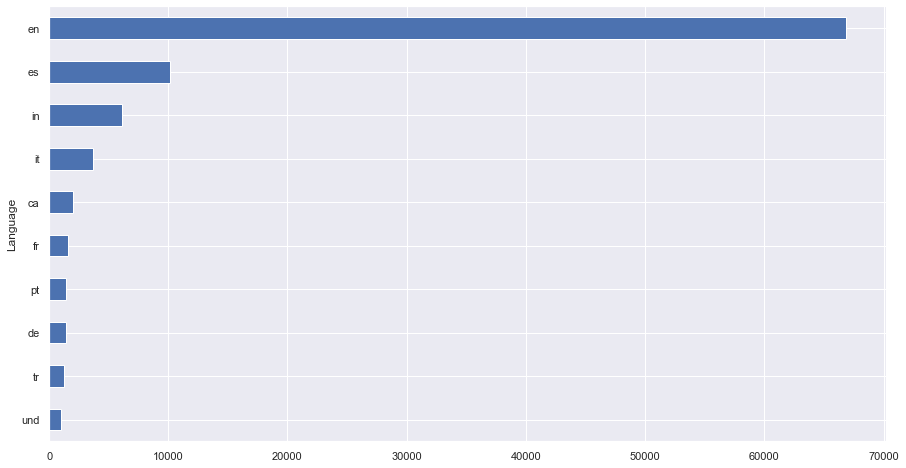

In [412]:
tweets_df.groupby('Language').size()[tweets_df.groupby('Language').size() > 1000].sort_values(ascending = True)\
        .plot.barh(ylabel = 'Number of Tweets');

English is the most common language, with over 65000 tweets, followed by Spanish with only around 10000 tweets. I will only keep tweets that are written in English.

In [413]:
tweets_df = tweets_df[tweets_df['Language'] == 'en']

In [414]:
tweets_df.reset_index(drop = True, inplace = True)

Again will count the number of words in the tweets to find the most common words

In [398]:
import re

In [361]:
tweets_list = tweets_df['Text'].tolist()

In [403]:
tweet_word_count = collections.Counter()
tweet_str = ''
for tweet in tweets_list:
    tweet = re.sub('http\S+', '', tweet) # removing the hyperlink of the tweet
    tweet_words = word_tokenize((tweet.lower())) # did not use TweetTokenizer because would have taken a longer time
    for word in tweet_words:
        if word not in STOPWORDS and word.isalpha() == True and word != 'london' and word != 'school' \
        and word != 'economics' and word != 'political' and word != 'science': # Removed these words as its the school name (search term)
            tweet_word_count[word] += 1
            tweet_str = tweet_str + ' ' + word

Will also create a `pd.Dataframe` with tweets over 100 likes, to see what type of tweets are popular 

In [417]:
tweets_df_100 = tweets_df[tweets_df['Likes'] > 100].reset_index()
tweets_df_100.head()

index                  Datetime      Tweet Id  \
0    134 2022-04-23 14:38:12+00:00  1.517875e+18   
1    167 2022-04-22 11:56:06+00:00  1.517472e+18   
2    304 2022-04-16 20:41:50+00:00  1.515430e+18   
3    329 2022-04-15 12:55:01+00:00  1.514950e+18   
4    333 2022-04-15 07:58:45+00:00  1.514876e+18   

                                                Text  Likes         Username  \
0  Mzee Kibaki was the first student to obtain a ...    163    DuncanAbigaba   
1  A study by London School of Economics shows 50...    191  Devinder_Sharma   
2  "@GuyReuters graduated from the London School ...    202       igorsushko   
3  I'VE BEEN ACCEPTED TO DO A MASTERS DEGREE AT T...    221         ama25_em   
4  Kibbo Kift kinsmen on a pilgrimage to Stonehen...    255   the_stone_club   

  Language  
0       en  
1       en  
2       en  
3       en  
4       en

In [418]:
tweets_list_100 = tweets_df_100['Text'].tolist()

In [422]:
tweet_word_count_100 = collections.Counter()
tweet_str_100 = ''
for tweet in tweets_list_100:
    tweet = re.sub('http\S+', '', tweet) 
    tweet_words = word_tokenize((tweet.lower())) 
    for word in tweet_words:
        if word not in STOPWORDS and word.isalpha() == True and word != 'london' and word != 'school' \
        and word != 'economics' and word != 'political' and word != 'science': 
            tweet_word_count_100[word] += 1
            tweet_str_100 = tweet_str_100 + ' ' + word

# Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

## Guardian University Rankings <a class="anchor" id="eda_1"></a>

### University Rankings by Year <a class="anchor" id="eda_1_1"></a>
Will mainly use `plotly` to plot interactive graphs

In [22]:
import plotly.express as px

In [23]:
fig = px.line(df_uni_rankings[['Oxford', 'Cambridge', 'St Andrews', 
                               'Imperial College', 'London School of Economics', 'UCL', 
                               'Warwick', 'Durham']], # These are just universities I feel can be considered "top"
                               title = 'UK Guardian University Rankings by Year (Top Universities)')
fig.update_xaxes(title = 'Year')
fig.update_yaxes(autorange = "reversed", tickvals=[1, 5, 10, 15, 20, 25], title = 'UK Ranking')

From the graph above, we can see that LSE ranks well even among top universities in the UK, especially considering the fact that it primarily offers programmes in the social sciences. Although its ranking has dropped from 2015 to 2020, it has returned to the 4th position in the UK in 2022. The only other universities that can consistently rank above LSE are Oxford, Cambridge and St Andrews, which have all stayed in the top 3 for more than a decade. The only exceptions were when LSE was ranked 3rd in 2013-2014 and when Warwick was ranked 3rd in 2011.

In [24]:
fig = px.line(df_uni_rankings[['Imperial College', 'London School of Economics', 
                               'UCL', "King's College London", 'City', 'Royal Holloway',
                               'Middlesex', 'East London', 'London South Bank']], 
                               title = 'UK Guardian University Rankings by Year (London Universities)')
fig.update_xaxes(title = 'Year')
fig.update_yaxes(autorange = "reversed", tickvals=[1, 20, 40, 60, 80, 100], title = 'UK Ranking')

The above plot shows how LSE ranks compared to other London Universities, as LSE is also based in London, and the first plot only considered the top universities. So this ranking will allow me to see how LSE ranks compared to other "lower" ranked universities. 

LSE ranks very well compared to other London universities. Consistently staying in the top 3 highest ranked from 2010-2022. The other two universities in the top 3 are Imperial and UCL, which I have considered top universities in the previous ranking. LSE has also not dropped out of the top 20 highest-ranked universities in the UK. Whereas these other universities have not even made past the top 20 rankings. (except for City in 2017)

This shows that LSE is a better university in terms of ranking compared to many other universities in London and in the UK, and should be considered as one of the "top" universities (as it ranks fairly well even against the top). 

### Course Satisfaction (2018-2022) <a class="anchor" id="eda_1_2"></a>
#### Descriptive Statistics for Top Universities

In [73]:
df_satisfaction[['St Andrews','Imperial College', 'London School of Economics', 
                'UCL', 'Warwick', 'Durham']].describe()

Institution  St Andrews  Imperial College  London School of Economics  \
count          5.000000          5.000000                    5.000000   
mean          93.600000         82.740000                   75.620000   
std            0.839643          0.978775                    4.888967   
min           93.000000         81.600000                   69.000000   
25%           93.000000         82.000000                   73.000000   
50%           93.100000         83.000000                   75.400000   
75%           94.000000         83.000000                   80.100000   
max           94.900000         84.100000                   80.600000   

Institution        UCL    Warwick     Durham  
count         5.000000   5.000000   5.000000  
mean         80.700000  86.700000  86.740000  
std           2.357965   1.646208   2.518531  
min          78.100000  84.600000  83.900000  
25%          79.000000  86.000000  85.000000  
50%          81.000000  86.200000  86.100000  
75%          81.200000  88.000000  89.000000  
max          84.200000  88.700000  89.700000

#### Descriptive Statistics for London Universities

In [74]:
df_satisfaction[['Imperial College', 'London School of Economics', 
                               'UCL', "King's College London", 'City', 'Royal Holloway',
                               'Middlesex', 'East London', 'London South Bank']].describe()

Institution  Imperial College  London School of Economics        UCL  \
count                5.000000                    5.000000   5.000000   
mean                82.740000                   75.620000  80.700000   
std                  0.978775                    4.888967   2.357965   
min                 81.600000                   69.000000  78.100000   
25%                 82.000000                   73.000000  79.000000   
50%                 83.000000                   75.400000  81.000000   
75%                 83.000000                   80.100000  81.200000   
max                 84.100000                   80.600000  84.200000   

Institution  King's College London       City  Royal Holloway  Middlesex  \
count                     5.000000   5.000000        5.000000   5.000000   
mean                     79.640000  79.520000       86.220000  77.600000   
std                       3.051721   5.601071        2.331738   3.360803   
min                      75.500000  70.800000       82.300000  72.800000   
25%                      78.900000  77.200000       86.000000  76.700000   
50%                      79.000000  82.000000       87.000000  77.000000   
75%                      81.000000  83.000000       87.700000  80.000000   
max                      83.800000  84.600000       88.100000  81.500000   

Institution  East London  London South Bank  
count           5.000000           5.000000  
mean           80.640000          79.780000  
std             3.788535           3.484537  
min            75.100000          73.700000  
25%            79.200000          80.000000  
50%            80.900000          81.600000  
75%            83.000000          81.600000  
max            85.000000          82.000000

Both of these summary statistics of the course satisfaction reveal a similar story. LSE has one of the lowest course satisfaction. Having the lowest mean, min and max satisfaction compared to all the universities above. 

In [25]:
fig = px.line(df_satisfaction[['St Andrews','Imperial College', 'London School of Economics', 
                               'UCL', 'Warwick', 'Durham']], 
                               title = 'Course Satisfaction by Year (Top Universities)')
fig.update_xaxes(ticktext = ['2018', '2019', '2020', '2021', '2022'],
                 tickvals = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'], title = 'Year')
fig.update_yaxes(tickvals = [70, 75, 80, 85, 90, 95], title = 'Course Satisfaction (out of 100)')
fig.show()

This plot shows that LSE has a significantly lower course satisfaction compared to its counterparts. Consistently ranked with the lowest course satisfaction amongst top universities except for 2022. 

In [26]:
fig = px.line(df_satisfaction[['Imperial College', 'London School of Economics', 
                               'UCL', "King's College London", 'City', 'Royal Holloway',
                               'Middlesex', 'East London', 'London South Bank']], 
                               title = 'Course Satisfaction by Year (London Universities)')
fig.update_xaxes(ticktext = ['2018', '2019', '2020', '2021', '2022'],
                 tickvals = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01'], title = 'Year')
fig.update_yaxes(tickvals = [70, 75, 80, 85], title = 'Course Satisfaction (out of 100)')
fig.show()

Surprisingly, even when compared to other lower-ranked London Universities, LSE has a significantly lower course satisfaction during 2018-2020, dropping from 75.4 to 69. This has gotten better during 2021 and 2022, where it has risen up to 80.6 in 2021. 

Will also use seaborn for some graph plotting

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

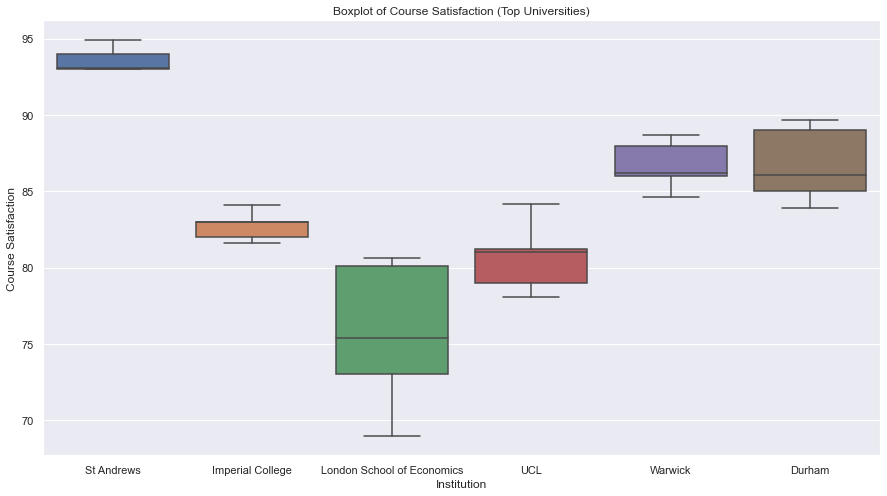

In [191]:
ax = sns.boxplot(data = df_satisfaction[['St Andrews','Imperial College', 'London School of Economics', 
                'UCL', 'Warwick', 'Durham']])
sns.set(rc={"figure.figsize":(15, 8)})
ax.set(ylabel = 'Course Satisfaction', title = 'Boxplot of Course Satisfaction (Top Universities)');

From this boxplot, we notice that the course satisfaction does not fluctuate greatly for each university, even throughout 5 years, and mostly stays within a small range.

Again, the London School of Economics clearly has the lowest satisfaction among these top universities, with satisfaction levels ranging from 69 to 80.6. Whereas St Andrews has one of the highest satisfaction among the top universities, with its lowest being 93, which is still higher than the highest course satisfaction of Durham (with the second highest satisfaction). 

Admittedly, there are only 5 data points so these box plots may not be really suitable. However, this still clearly shows how LSE has a lower course satisfaction compared to most other universities (although this has gotten better in the past 2 years).

## Guardian API <a class="anchor" id="eda_2"></a>

### Articles <a class="anchor" id="eda_2_1"></a>

These are the most popular tokens seen in the articles, will plot a graph and a word cloud to better visualise the data

In [252]:
word_count.most_common(20)

[('people', 8397),
 ('one', 8253),
 ('university', 7918),
 ('said', 6585),
 ('london', 6459),
 ('new', 5717),
 ('government', 5450),
 ('says', 5081),
 ('students', 4826),
 ('years', 4687),
 ('time', 4521),
 ('us', 4240),
 ('school', 4039),
 ('year', 4015),
 ('work', 3933),
 ('first', 3929),
 ('many', 3901),
 ('public', 3846),
 ('world', 3801),
 ('social', 3767)]

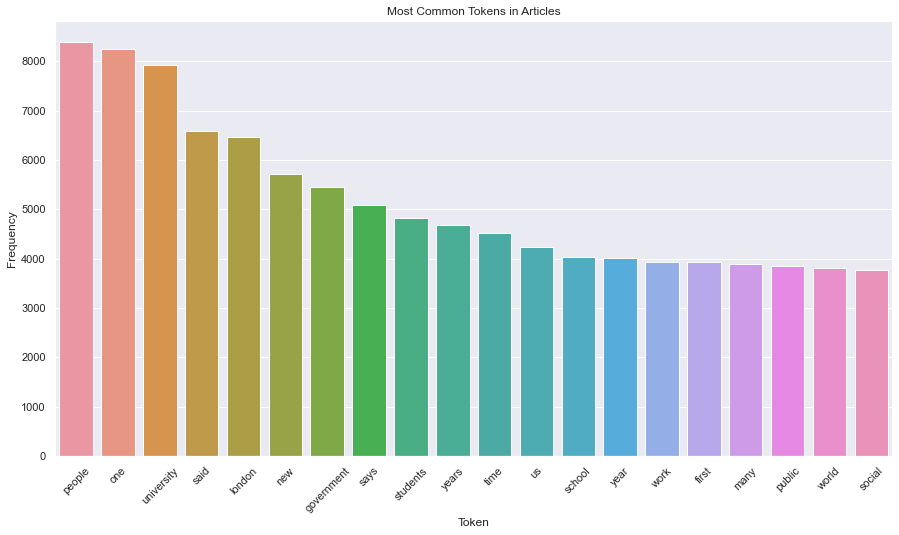

In [286]:
count_df = pd.DataFrame(word_count.most_common(20), columns= ['Token', 'Frequency'])
sns.barplot(data = count_df, x = 'Token', y = 'Frequency')
plt.xticks(rotation = 45)
plt.title('Most Common Tokens in Articles');

Will plot a Word Cloud using `all_articles_str` I created when I loaded the API data.

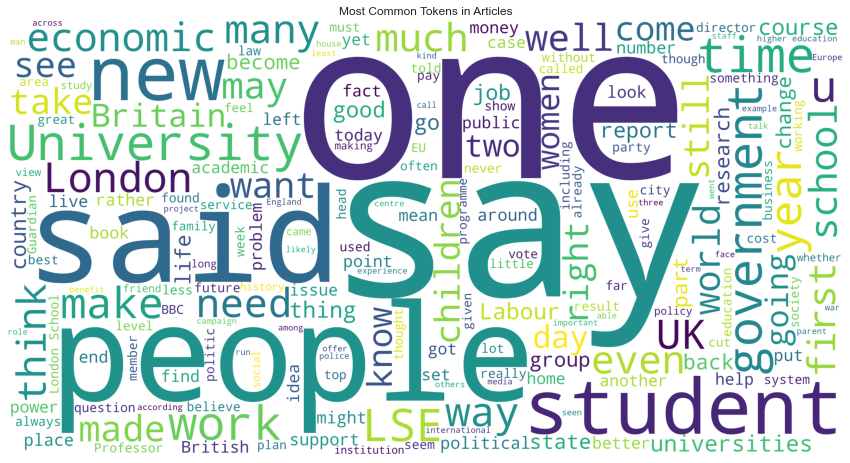

In [287]:
wc = WordCloud(stopwords = x, background_color = "white", width = 5000, height = 2600).generate(all_articles_str)
plt.imshow(wc)
plt.axis("off")
plt.title('Most Common Tokens in Articles');

From the word cloud above, we can identify words such as `student`, `university`, and `work`. Which are of relevance to LSE as it is an educational institution for students in higher education. The word cloud is not that useful as there do not seem to be any words that are specific to LSE that might differentiate it from other places of higher education. 

From the bar chart above, words such as `government`, `public`, `world` and `social` can be identified more clearly, which are words that are more associated with LSE compared to other universities in the UK. As the school is a social sciences specialist university, these words are highly relevant and also give us a better idea of what subjects the school is associated with.

### Article Titles <a class="anchor" id="eda_2_2"></a>

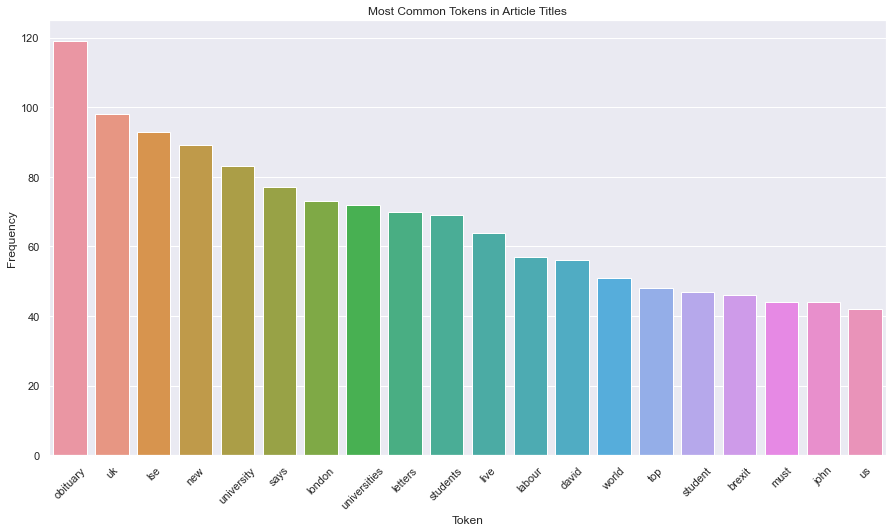

In [288]:
count_df = pd.DataFrame(word_count_title.most_common(20), columns= ['Token', 'Frequency'])
sns.barplot(data = count_df, x = 'Token', y = 'Frequency')
plt.xticks(rotation = 45)
plt.title('Most Common Tokens in Article Titles');

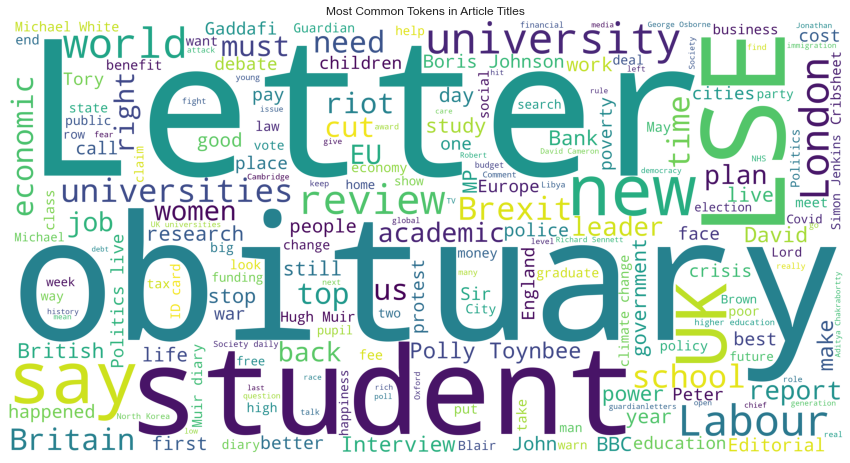

In [289]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords = STOPWORDS, background_color = "white", width = 5000, height = 2600).generate(all_titles_str)
plt.imshow(wc)
plt.axis("off")
plt.title('Most Common Tokens in Article Titles');

The above word cloud is better than the first one. Words like `Brexit`, `leader`, `right`, and `world`, can be identified. Which are words people usually associate LSE with. 

However, interestingly, the most common word in the article titles is `obituary`. After some investigation, I found that The Guardian writes obituaries for famous individuals, which can sometimes happen to be LSE alumni. Therefore, causing `obituary` to be the most common term in titles related to LSE.

### Article Sections <a class="anchor" id="eda_2_3"></a>

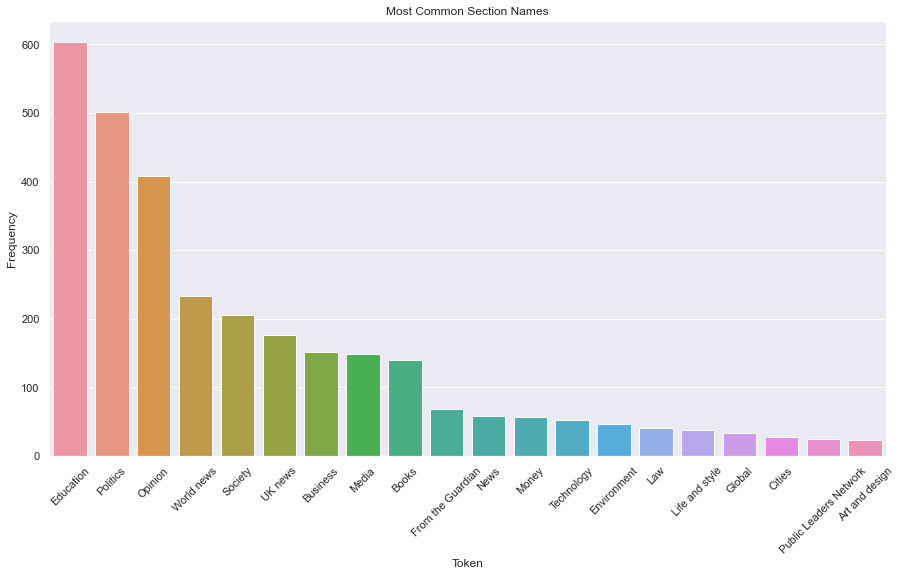

In [290]:
count_df = pd.DataFrame(word_count_sections.most_common(20), columns= ['Token', 'Frequency'])
sns.barplot(data = count_df, x = 'Token', y = 'Frequency')
plt.xticks(rotation = 45)
plt.title('Most Common Sections');

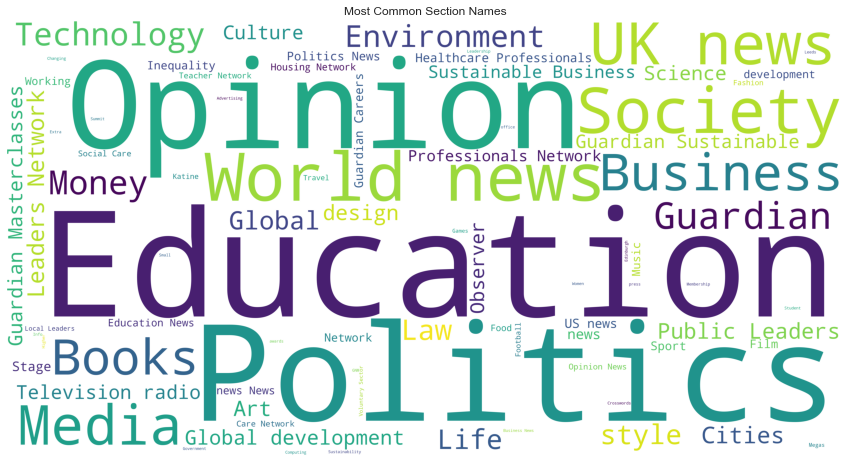

In [291]:
from wordcloud import WordCloud, STOPWORDS # Figure out which stopwords are good to use
wc = WordCloud(stopwords = STOPWORDS, background_color = "white", width = 5000, height = 2600).generate(all_sections_str)
plt.imshow(wc)
plt.axis("off")
plt.title('Most Common Sections');

Arguably, the name of the section of each article provides us with the best insight compared to the above measures on answering our reserach question. Sections such as `Education`, `Politics`, `Opinion`, `Society`, `World News`, `Money`, `Leaders Network` and `Professionals Network` are all words highly related to LSE. The article sections `Education`, `Politics` and `Opinion` are the most common. This gives us a good idea of the topics the public/news associates LSE with, an educational institution which is focussed on the social sciences while also focussing on networking.

## Tweets <a class="anchor" id="eda_3"></a>

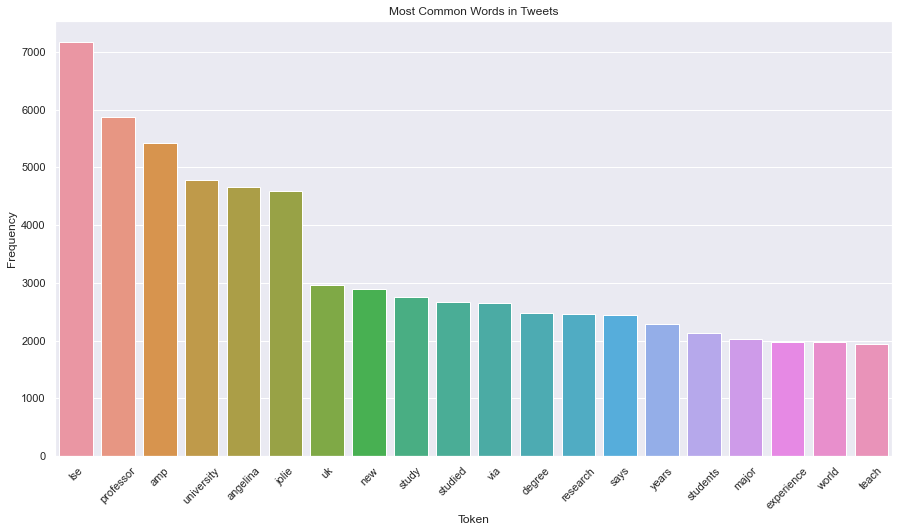

In [404]:
count_df = pd.DataFrame(tweet_word_count.most_common(20), columns= ['Token', 'Frequency'])
sns.barplot(data = count_df, x = 'Token', y = 'Frequency')
plt.xticks(rotation = 45)
plt.title('Most Common Words in Tweets');

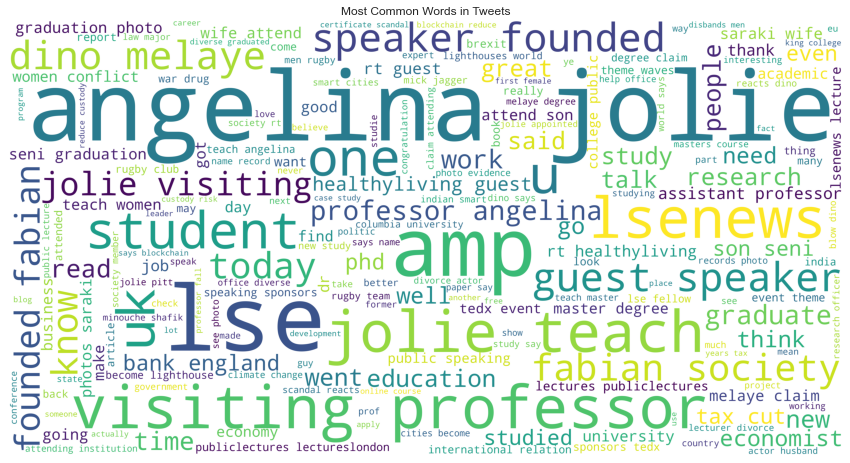

In [405]:
from wordcloud import WordCloud, STOPWORDS # Figure out which stopwords are good to use
wc = WordCloud(stopwords = STOPWORDS, background_color = "white", width = 5000, height = 2600).generate(tweet_str)
plt.imshow(wc)
plt.axis("off")
plt.title('Most Common Words in Tweets');

Unsurprisingly, the tweets mainly related to LSE are mostly words you would often see related to universities. Such as `speaker founded`, `visiting professor` and `student`. However, an exception is the common appearance of `angelina jolie`, `jolie visiting`, `professor angelina` and `jolie teach`. Angelina Jolie is a visiting lecturer at LSE who also is an actress and filmmaker. So it is reasonable that her social media presence is quite strong which we see here in the word cloud.  Where a number of tweets with the term `London School of Economics` in them also contain her name.  

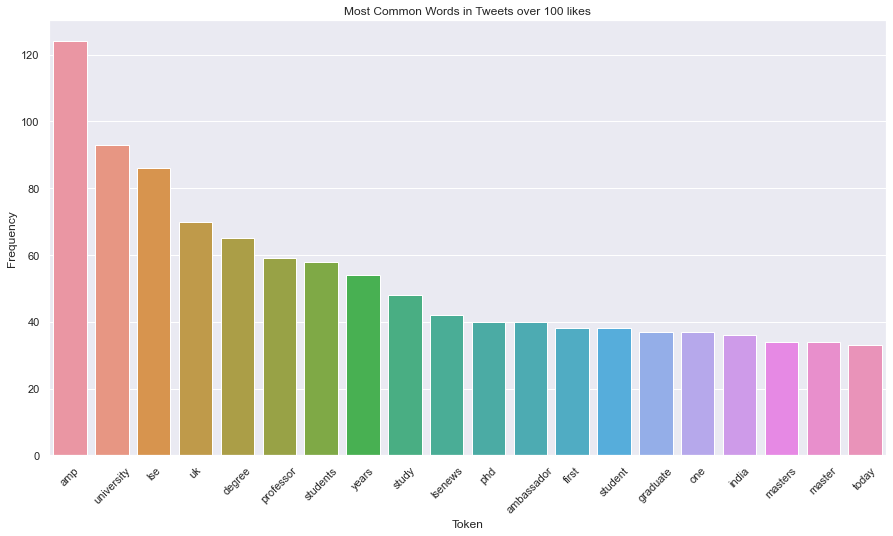

In [423]:
count_df = pd.DataFrame(tweet_word_count_100.most_common(20), columns= ['Token', 'Frequency'])
sns.barplot(data = count_df, x = 'Token', y = 'Frequency')
plt.xticks(rotation = 45)
plt.title('Most Common Words in Tweets over 100 likes');

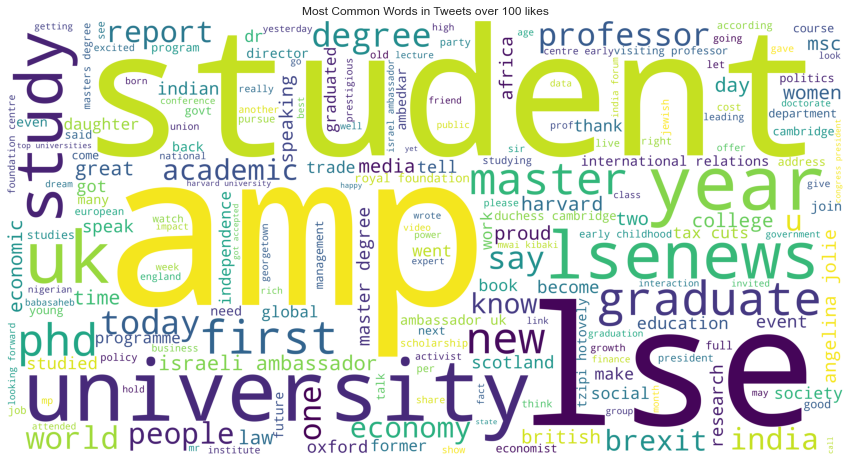

In [425]:
from wordcloud import WordCloud, STOPWORDS # Figure out which stopwords are good to use
wc = WordCloud(stopwords = STOPWORDS, background_color = "white", width = 5000, height = 2600).generate(tweet_str_100)
plt.imshow(wc)
plt.axis("off")
plt.title('Most Common Words in Tweets over 100 likes');

For tweets over 100 likes, we see that there are a lot fewer tweets related to Angelina Jolie, this could possibly be because the accounts tweeting about her are spambots so they do not get many likes. 

For tweets that get over 100 likes, we see that some of the most popular terms are `amp`, `university`, `student`, `degree`, `study`, `phd` and `year`. This is sensible as these are words highly related to a university. `amp` is an anomaly because it could stand for Applicant Mentoring Programme or the Advertising Marketing and Pr society, so more investigation will be required to see what exactly are the tweets with `amp` getting over 100 likes.

Interestingly, one of the more common words is `lsenews`, which means some tweets from lsenews are quite popular and the accounts that tweet about `lsenews` must tweet frequently as it appears on both word clouds.

In [435]:
tweets_df.groupby('Username').size().sort_values(ascending = False).head(10)

Username
Jennifer_chm002    1694
GJ_HigherEd         598
photorele           556
EverettPallets      442
lectures_london     387
CollPubSpeaking     367
LGBTmooting         191
Diversehistory2     172
Jobs4Jo             126
DanielWickham93     115
dtype: int64

After a quick search, we can see that the Twitter accounts that tweet the most about LSE are some private accounts with some "news" or official accounts such as `GJ_HigherED`, `lectures_london` and `Jobs4Jo`. There does not seem to have a clear trend on what types of accounts tweet the most about LSE.

# Conclusion <a class="anchor" id="conclusion"></a>

## How has the ranking of LSE changed over the years? And how does it compare with other universities? <a class="anchor" id="q1"></a>

From the interactive plots above, LSE's rankings were fairly high, with its highest-ranked 3rd in the UK. Its ranking dropped during 2015 to 2020, to 19th in the UK during 2020. Nonetheless, it managed to recover in 2021-2022, which is currently is ranked 4th in the UK. Although LSE was never ranked as the top 2 universities throughout the period of 2010-2022, it still is widely considered as one of the top institutions in the UK.

When compared to other top UK universities, LSE is still able to compete against most of them. With only Oxford and Cambridge being able to outrank LSE in all 12 years. Even for universities such as Imperial, Durham and UCL, LSE manages to maintain its position and is able to climb back up to the 4th spot even after dropping to the 19th rank in 2020. 

LSE greatly outranks most other London universities, with the exception of Imperial and UCL. This shows that LSE is a top institution to study and is higher rated than the majority of universities in the UK.

On the other hand, when comparing the `Satisfaction with course` column from 2018 to 2022, LSE ranks the lowest compared to other top universities and even some lower-ranked London universities. This may indicate that the "experience" at LSE may not be as satisfying compared to the other universities in the UK. Although this figure has improved during the period of 2021-2022, it will be interesting to see if this value will continue to increase or will it start to drop back to where it used to be.

To summarise, LSE is ranked very highly in the UK, but not as high as Oxbridge. However, LSE has low course satisfaction compared to its London counterparts. But still, this has significantly improved in recent years and the trend could continue.

## What does the public think of LSE? <a class="anchor" id="q2"></a>

From the Guardian API graphs above, we notice that words related to social sciences and education appear quite frequently, some examples are `student`, `university`, `education`, `politics`, `social`, `public` and `world`. This result is sensible as LSE is a social sciences institution. So the common words we see used by the Guardian News to talk about the school are related to students, education and sometimes world affairs. 

Another interesting thing to note is the 3 most common sections of articles related to LSE are `Education`, `Politics` and `Opinion`. This shows that articles related to LSE are mostly related to education and politics, while some opinion articles are written that are related to the school. This, therefore, represents what these authors and the general public (as they are the target audience of these news articles) associate the school with. 

From the Twitter data, we can see that most of the public tweets about LSE are related to the school and lecturers. Which is fairly similar to the Guardian API Data. Angelina Jolie in particular has a large presence which we have not seen in the news data. This is because she is an actress which is also known for her humanitarian work. She visits LSE once in a while as a visiting lecturer. The reason she might be strongly associated with LSE could be because of her large social media presence and her fans as an actress. So many people will tweet about her, which is shown through Twitter data.

However, very few of the tweets over 100 likes mention Angelina Jolie, so it may be possible the accounts tweeting about her are bots. The most popular words of tweets over 100 likes show a similar story, it contains many words related to an educational institution such as `student`, `university`, `master` and `study`.

In conclusion, we can see that the public that reports about LSE and talks about it on social media sees it as a social science educational institution for higher education. Which we have identified using the most common words in the articles and tweets.

## Limitations <a class="anchor" id="limitations"></a>
 
- Only the 1 data source for league tables
    - Only Guardian League Tables were used, there could be some bias in the tables and may make it not be fully representative, having more league tables from different websites may be a more accurate representation. 
    
    
- Could only compare with UK Universities 
    - The Guardian League Tables were only based in the UK
    
    
- Most Common Words ≠ What the public thinks of the school
    - Finding the most common words in articles may not be representative of what the public thinks of LSE. We can only find words/topics that the public associates with LSE. However, we cannot determine the public opinions of LSE, whether positive or negative.

In the future, I should try to use more sources to collect the data, to make sure that the analysis is not as one-sided. Further, if I am working on textual data, it might be worthwhile to perform sentiment analysis on the data to determine whether a text is positive, negative or neutral. This will allow me to gain a greater insight into the public opinions on a topic.